In [1]:
import numpy as np
from scipy.stats import ks_2samp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [93]:
one = pd.read_csv('submissions/aexgb0.csv')
two = pd.read_csv('submissions/sub_xgb.csv')
three = pd.read_csv('submissions/sub_xgb1.csv')
four = pd.read_csv('submissions/sub_xgb2.csv')
five = pd.read_csv('submissions/sub_xgb3.csv')
six = pd.read_csv('submissions/sub_xgb4.csv')
seven = pd.read_csv('submissions/sub_xgb5.csv')
eight = pd.read_csv('submissions/xgb_lolo.csv')
nine = pd.read_csv('submissions/xgb_lolo1.csv')
ten = pd.read_csv('submissions/sub_xgb6.csv')
eleven = pd.read_csv('submissions/sub_rnd.csv')
twelve = pd.read_csv('submissions/sub_gb_63.csv')
thirteen  = pd.read_csv('submissions/sub_adaboost.csv')
fourteen = pd.read_csv('submissions/sub_wv.csv')
fifteen = pd.read_csv('submissions/sub_wv1.csv')

In [11]:
target = 'Criminal'

In [12]:
final1 = pd.DataFrame()

In [94]:
final1['one'] = one[target]
final1['two'] = two[target]
final1['three'] = three[target]
final1['four'] = four[target]
final1['five'] = five[target]
final1['six'] = six[target]
final1['seven'] = seven[target]
final1['eight'] = eight[target]
final1['nine'] = nine[target]
final1['ten'] = ten[target]
final1['eleven'] = eleven[target]
final1['twelve'] = twelve[target]
final1['thirteen'] = thirteen[target]
final1['fourteen'] = fourteen[target]
final1['fifteen'] = fifteen[target]

In [95]:
final1.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


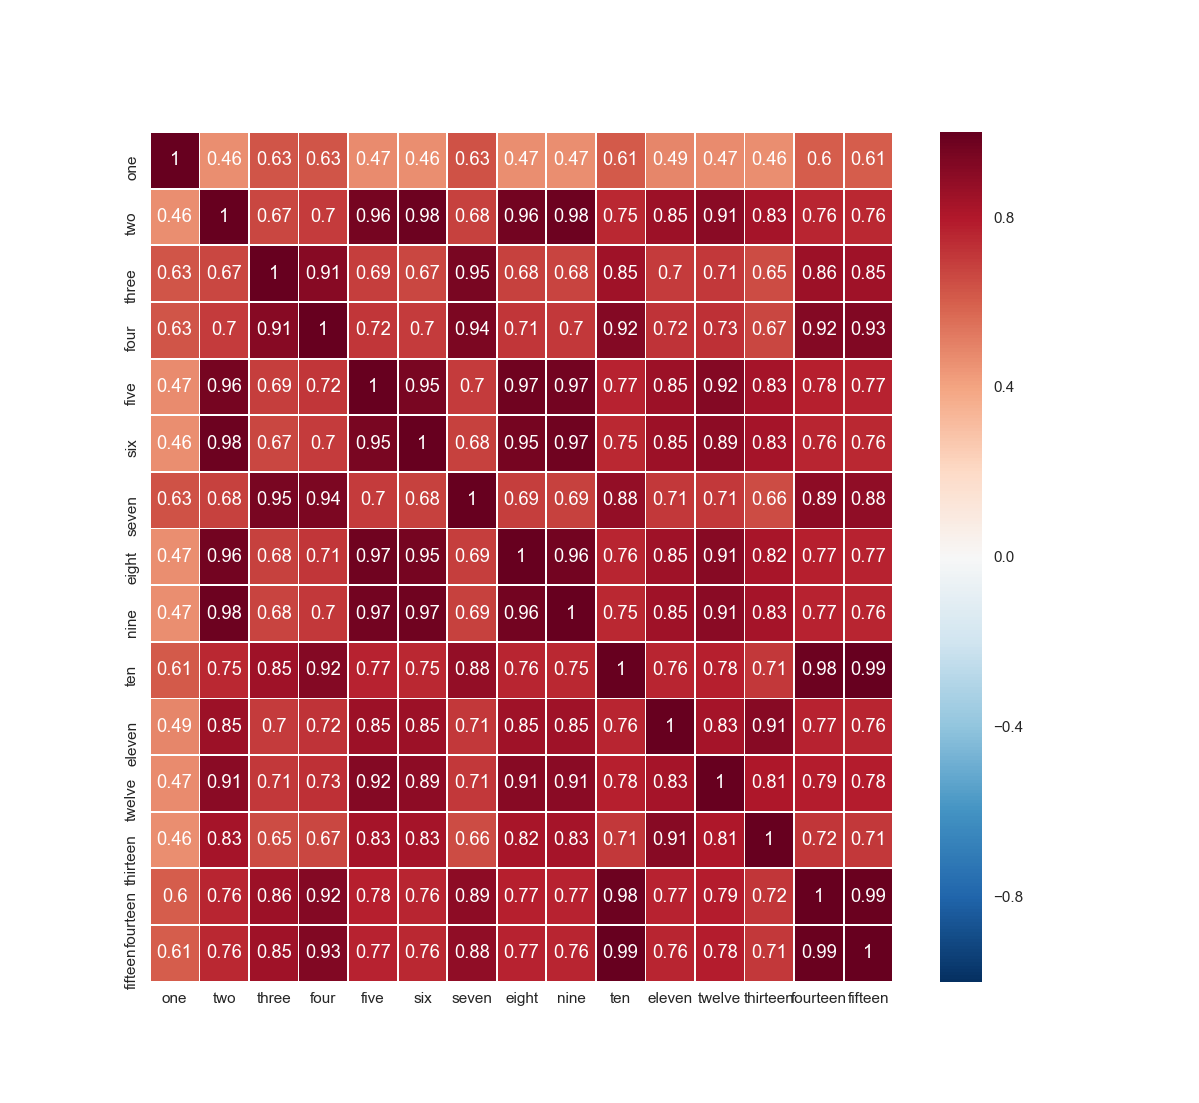

In [96]:
sns.heatmap(final1.corr(method='pearson'), annot=True, center=0, linewidths=.5)

In [16]:
ks_stat, p_value = ks_2samp(four[target].values, ten[target].values)
print(' Kolmogorov-Smirnov test:    KS-stat = %.6f    p-value = %.3e\n'% (ks_stat, p_value))

 Kolmogorov-Smirnov test:    KS-stat = 0.011986    p-value = 3.824e-01



### PLB : 0.84062 

In [53]:
weights = np.array([0.5, 2, 3, 7, 2, 2, 4, 2, 2, 7, 2]).reshape((11, 1))

In [30]:
weights.shape

(11, 1)

In [22]:
final1arr = final1.values

In [29]:
final1arr.shape

(11430, 11)

In [36]:
ans1 = (final1arr.dot(weights) / weights.sum()) >= 0.5 

In [38]:
ans1 = ans1.astype('int')

In [40]:
ans1.sum()

1027

In [41]:
ans1.shape

(11430, 1)

In [42]:
four['Criminal'].value_counts()

0    10236
1     1194
Name: Criminal, dtype: int64

In [43]:
ten['Criminal'].value_counts()

0    10373
1     1057
Name: Criminal, dtype: int64

In [44]:
sub = pd.DataFrame(columns=['PERID', 'Criminal'])

In [45]:
sub['PERID'] = one['PERID']
sub['Criminal'] = ans1

In [47]:
sub.to_csv('submissions/sub_wv.csv', index=False)

###  PLB : 0.84093

In [57]:
final1arr = final1.values

In [89]:
weights1 = np.array([0.5, 2, 3, 15, 2, 2, 4, 2, 2, 15, 2, 2, 1]).reshape((13, 1))

In [90]:
ans2 = ((final1arr.dot(weights1) / weights1.sum()) >= 0.5) .astype('int')

In [91]:
sub['PERID'] = one['PERID']
sub['Criminal'] = ans2
sub.to_csv('submissions/sub_wv1.csv', index=False)

In [92]:
sub['Criminal'].value_counts()

0    10386
1     1044
Name: Criminal, dtype: int64

In [97]:
final1arr = final1.values

In [100]:
weights2 = np.array([0.5, 2, 3, 15, 2, 2, 4, 2, 2, 15, 2, 2, 1, 15, 20]).reshape((15, 1))

In [101]:
ans3 = ((final1arr.dot(weights2) / weights2.sum()) >= 0.5) .astype('int')

In [102]:
sub['PERID'] = one['PERID']
sub['Criminal'] = ans3
sub.to_csv('submissions/sub_wv2.csv', index=False)

In [103]:
sub['Criminal'].value_counts()

0    10386
1     1044
Name: Criminal, dtype: int64